In [ ]:
[151 152 156 157 158 160 161 162 163 164 165 166 168 169 170 172 173 175 176 179 182 183 186]
[151 152 156 157 158 160 161 162 163 164 165 166 168 169 170 172 173 175 176 179 182 183 186]
[151 152 156 157 158 160 161 162 163 164 165 166 168 169 172 173 175 176 179 182 183 186]
[151 152 156 157 158 160 161 162 163 164 165 166 169 170 172 173 176 179 182 183 186] -> [161 170]
[151 152 156 157 158 160 162 163 164 165 166 169 171 172 173 176 179 182 183 186] -> [171]
[151 152 156 157 158 160 162 163 164 165 166 169 172 173 175 176 179 182 183 186] -> [175]
[151 152 156 157 158 160 161 162 163 164 165 166 168 169 170 172 173 175 176 179 182 183 186]
[151 152 156 157 158 160 161 162 163 164 165 166 168 169 170 172 173 175 176 179 182 183 186]
[151 152 156 157 158 160 161 162 163 164 165 166 168 169 170 172 173 175 176 179 182 183 186]

[153 154 155 159 167 180 181 185 187] x [174]
[153 154 155 159 167 174 180 181 185 187]
[153 155 167 174 180 181 185 187] x [154 159]
[153 154 155 159 167 180 181 184 185] -> [184]
[153 154 155 159 167 180 181 185] x [174 187]
[153 154 159 167 180 181 184] x [155 174 185 187]
[153 155 159 167 174 180 181 185]
[153 155 167 174 180 181 185]
[153 155 167 174 180 181 185]

In [ ]:
from kervis.utils import Model, Dataset, create_models
from kervis.kernels import VertexHistogram, EdgeHistogram, ShortestPath, GraphletSampling, WeisfeilerLehman

In [2]:
MUTAG = Dataset('MUTAG', cmap="tab20b")

In [3]:
VH = VertexHistogram()
EH = EdgeHistogram()
SP = ShortestPath()
GS_3 = GraphletSampling(k=3)
GS_4 = GraphletSampling(k=4)
GS_5 = GraphletSampling(k=5)
WL_3 = WeisfeilerLehman(n_iter=3)
WL_4 = WeisfeilerLehman(n_iter=4)
WL_5 = WeisfeilerLehman(n_iter=5)

non_parametric_kernels = [VH, EH, SP]
parametric_kernels = [GS_3, GS_4, GS_5, WL_3, WL_4, WL_5]

In [4]:
# set a seed for SHAP
seed = 42

# Non-parametric kernels

In [5]:
non_parametric_models = create_models(non_parametric_kernels, MUTAG, seed=seed)

The number of p graphs: 26


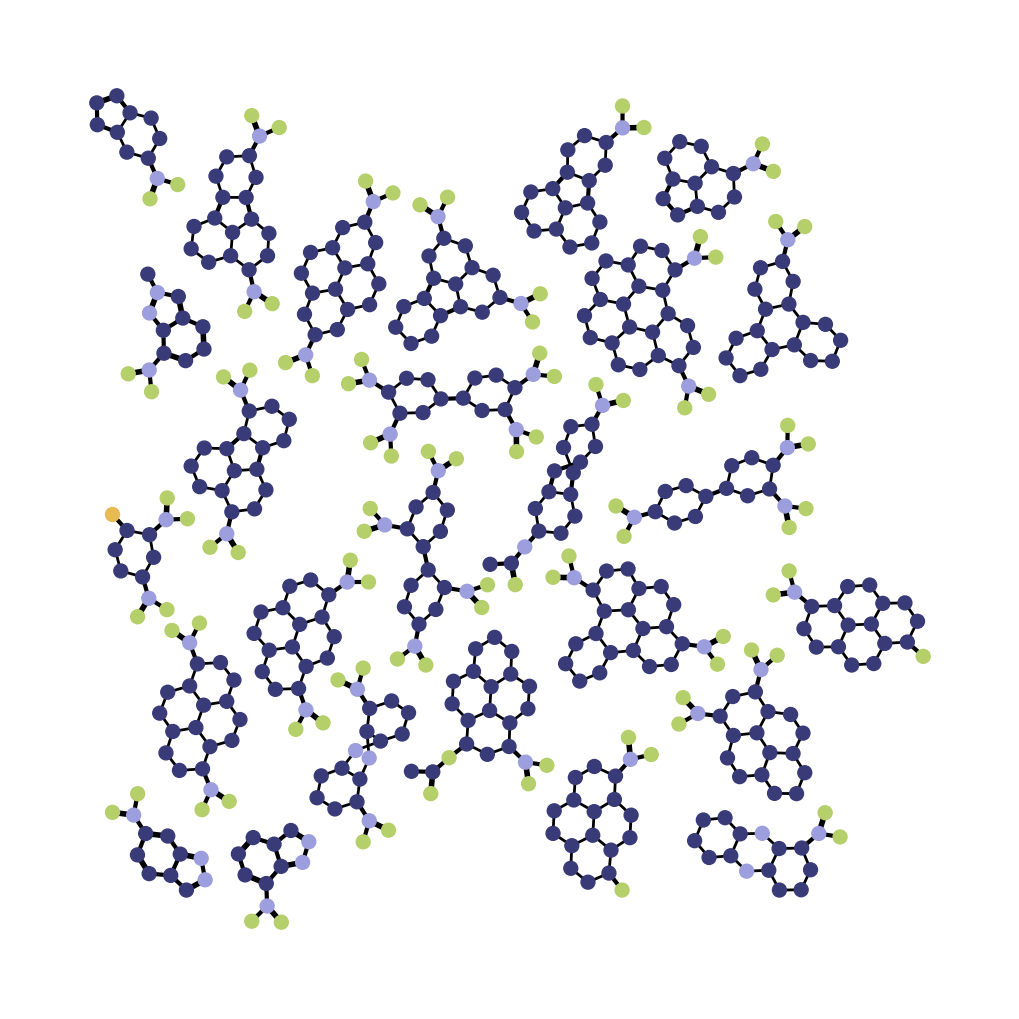

The number of n graphs: 12


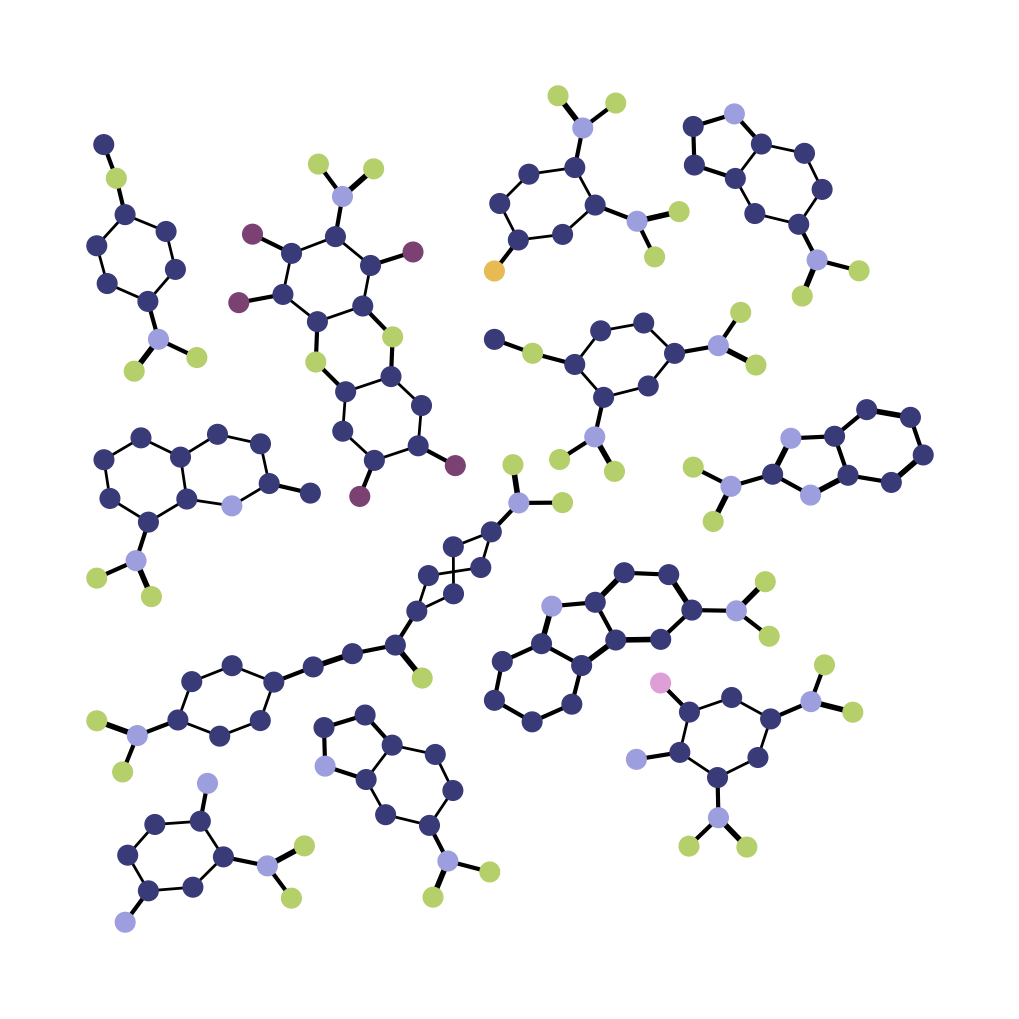

In [6]:
non_parametric_models["VH"].display_T("p", 100)
non_parametric_models["VH"].display_T("n", 200)

In [7]:
for model in non_parametric_models.values(): model.explain()

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


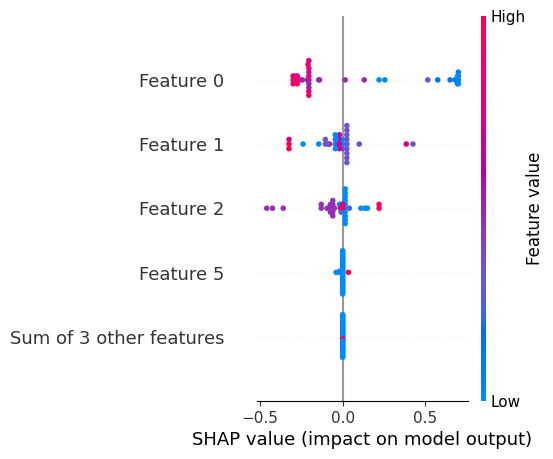

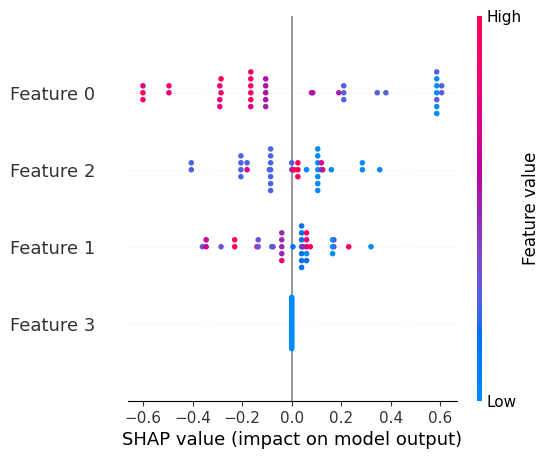

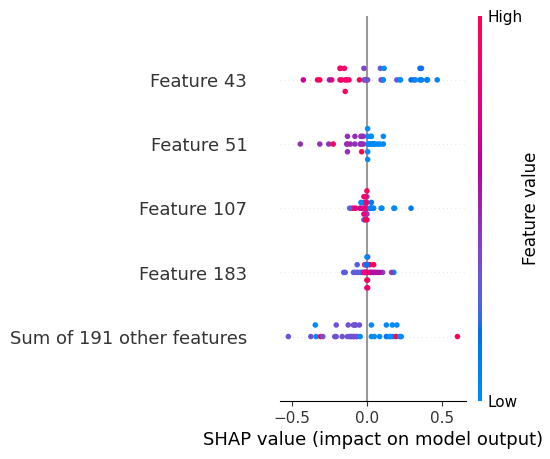

In [8]:
non_parametric_models["VH"].summary_plot(max_display=5, figsize=(3.4, 5))
non_parametric_models["EH"].summary_plot(max_display=5, figsize=(5.3, 5))
non_parametric_models["SP"].summary_plot(max_display=5, figsize=(3, 5))

In [9]:
non_parametric_models["SP"].kernel.attributes[43]

(0, 0, 2)

Graph indices: [151 152 156 157 158 160 161 162 163 164 165 166 168 169 170 172 173 175
 176 179 182 183 186]
[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0]
Counter({0: 18, 1: 4, 2: 1})


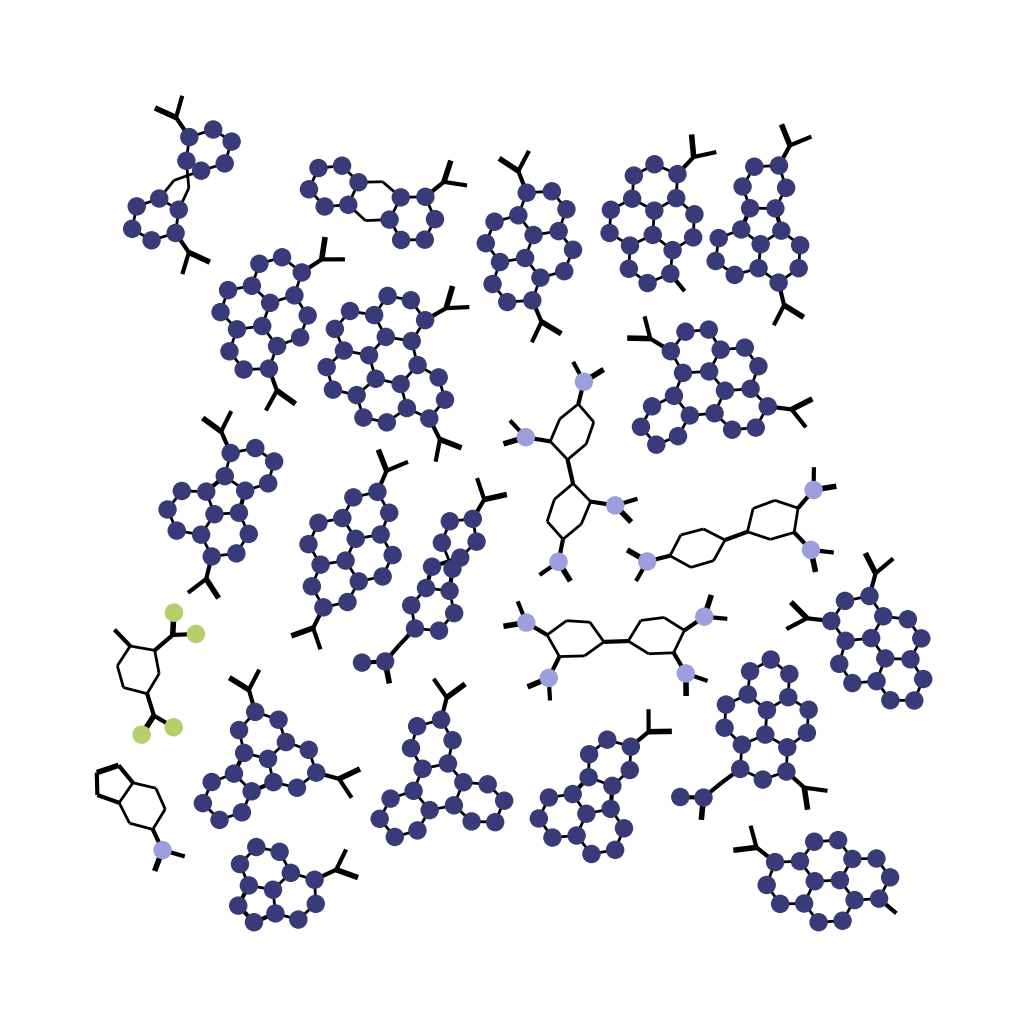

Graph indices: [153 154 155 159 167 180 181 185 187]
[0, 0, 0, 0, 0, 0, 0, 0, 1]
Counter({0: 8, 1: 1})


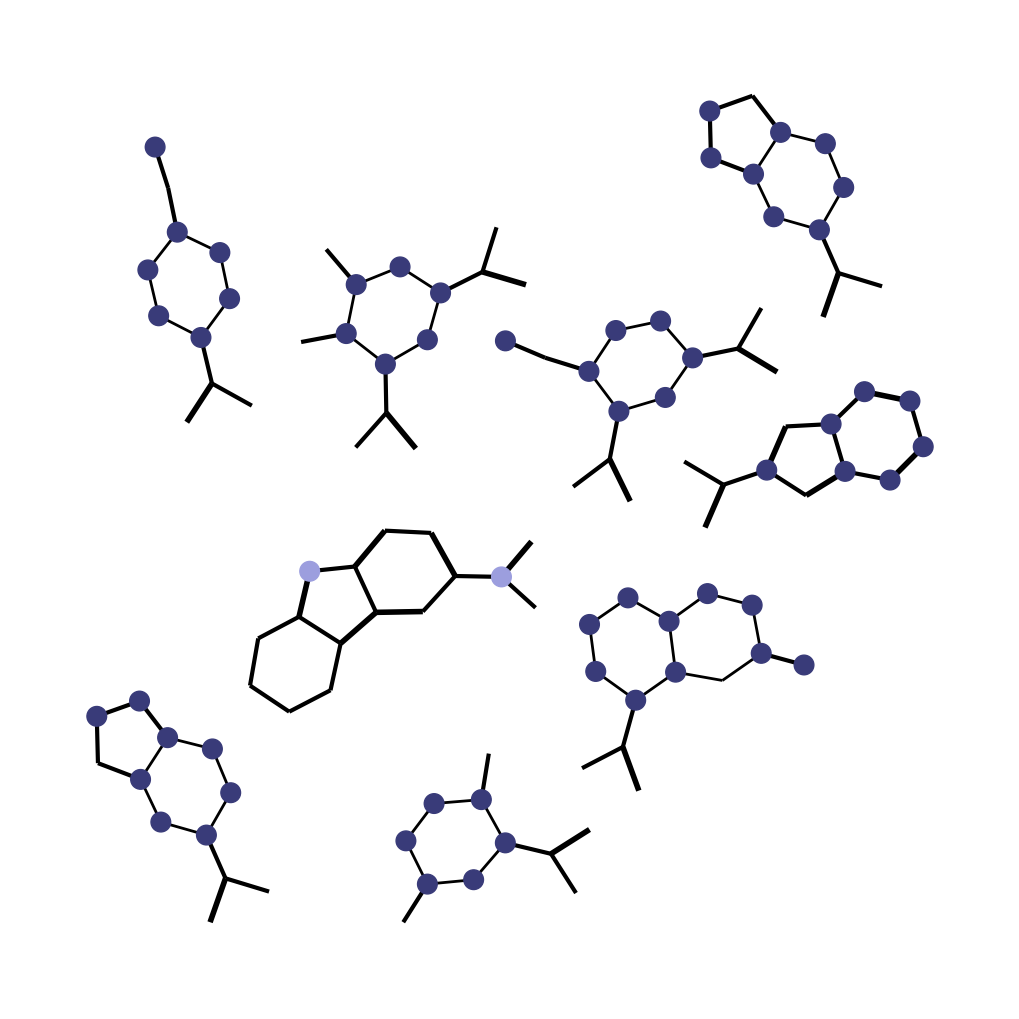

In [10]:
non_parametric_models["VH"].highlight_all("tp", 150)
non_parametric_models["VH"].highlight_all("tn", 200)

Graph indices: [151 152 156 157 158 160 161 162 163 164 165 166 168 169 170 172 173 175
 176 179 182 183 186]
[0, 1, 0, 1, 0, 2, 1, 2, 2, 0, 0, 0, 2, 0, 1, 1, 0, 1, 2, 0, 0, 0, 0]
Counter({0: 12, 1: 6, 2: 5})


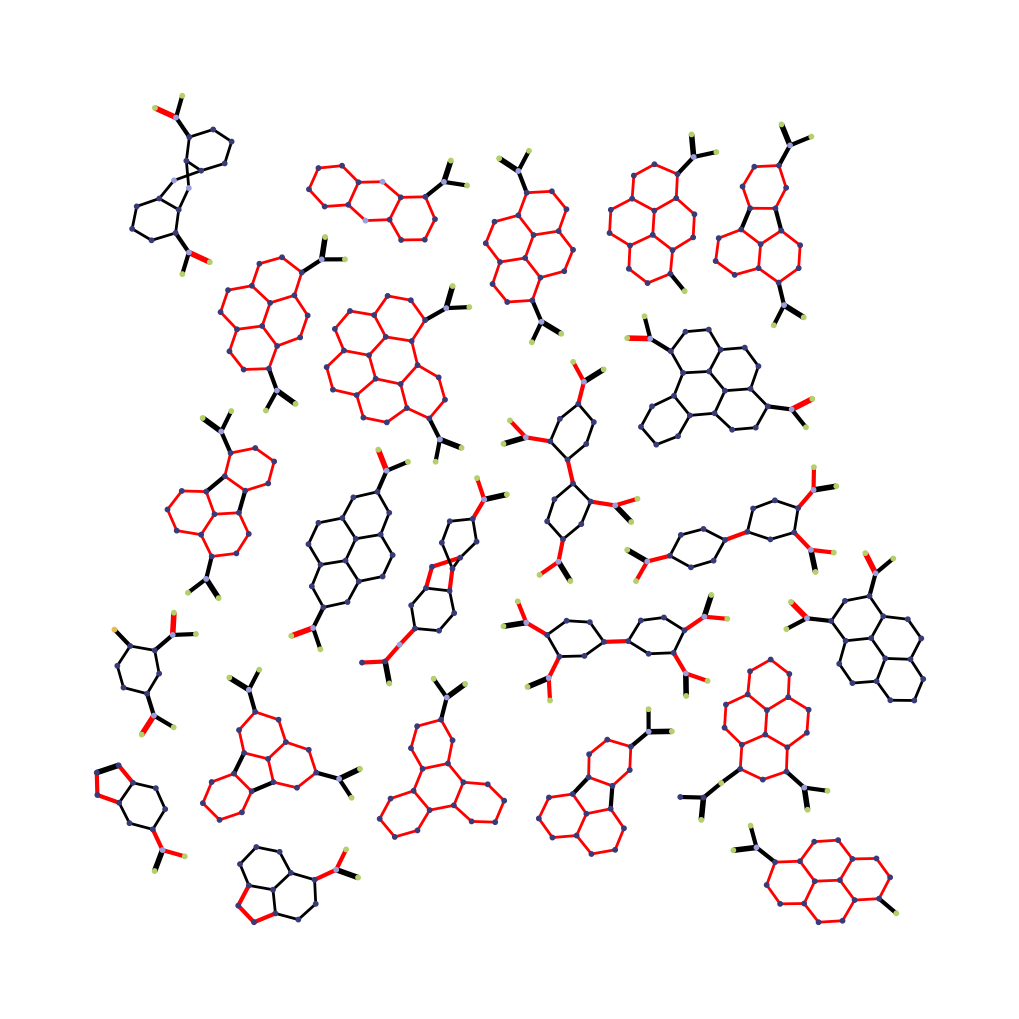

Graph indices: [153 154 155 159 167 174 180 181 185 187]
[0, 0, 0, 0, 0, 2, 0, 1, 0, 0]
Counter({0: 8, 2: 1, 1: 1})


In [11]:
non_parametric_models["EH"].highlight_all("tp", 10)
non_parametric_models["EH"].highlight_all("tn", 40)

In [63]:
# non_parametric_models["EH"].dataset.plot_graph(174, 200)

Graph indices: [151 152 156 157 158 160 161 162 163 164 165 166 168 169 172 173 175 176
 179 182 183 186]
[43, 43, 43, 43, 43, 51, 190, 43, 51, 43, 43, 43, 51, 53, 51, 43, 4, 139, 107, 43, 43, 43]
Counter({43: 13, 51: 4, 190: 1, 53: 1, 4: 1, 139: 1, 107: 1})


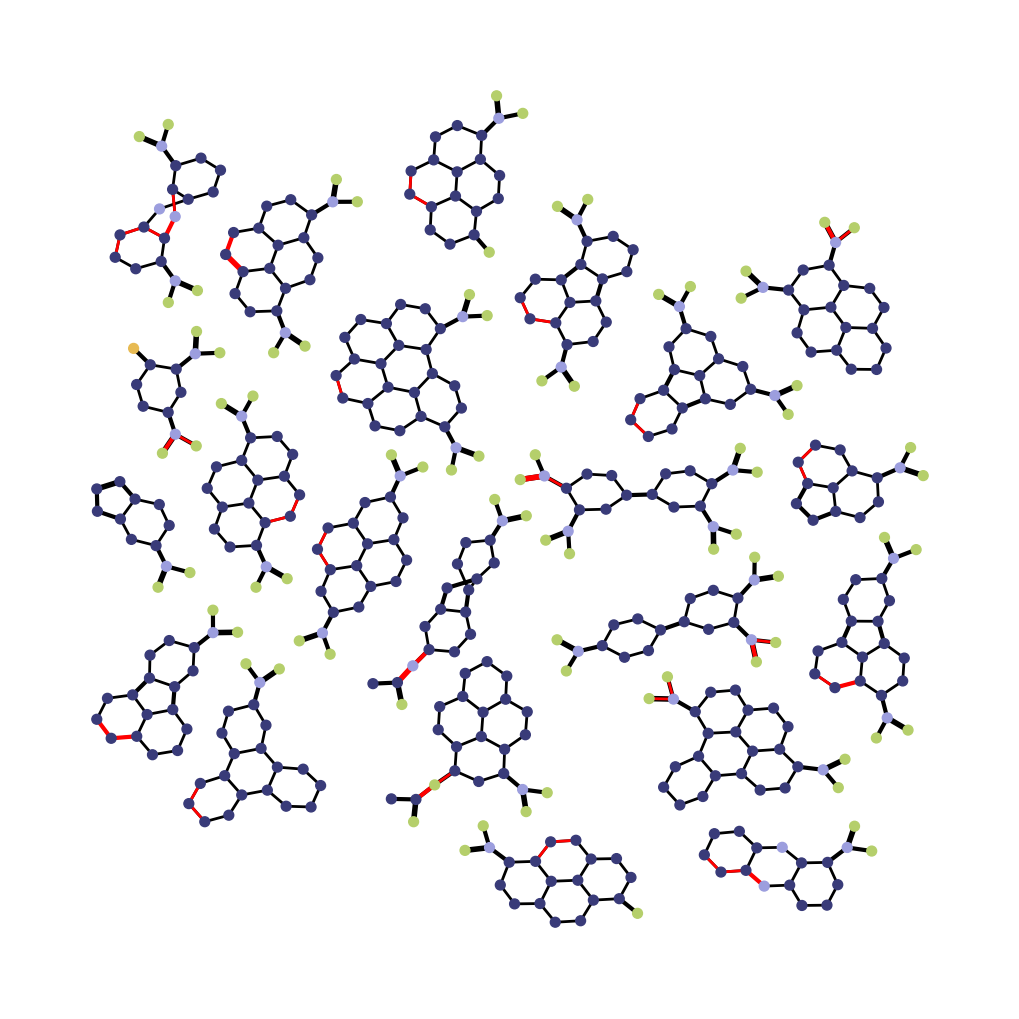

Graph indices: [153 155 167 174 180 181 185 187]
[43, 43, 43, 160, 43, 43, 43, 43]
Counter({43: 7, 160: 1})


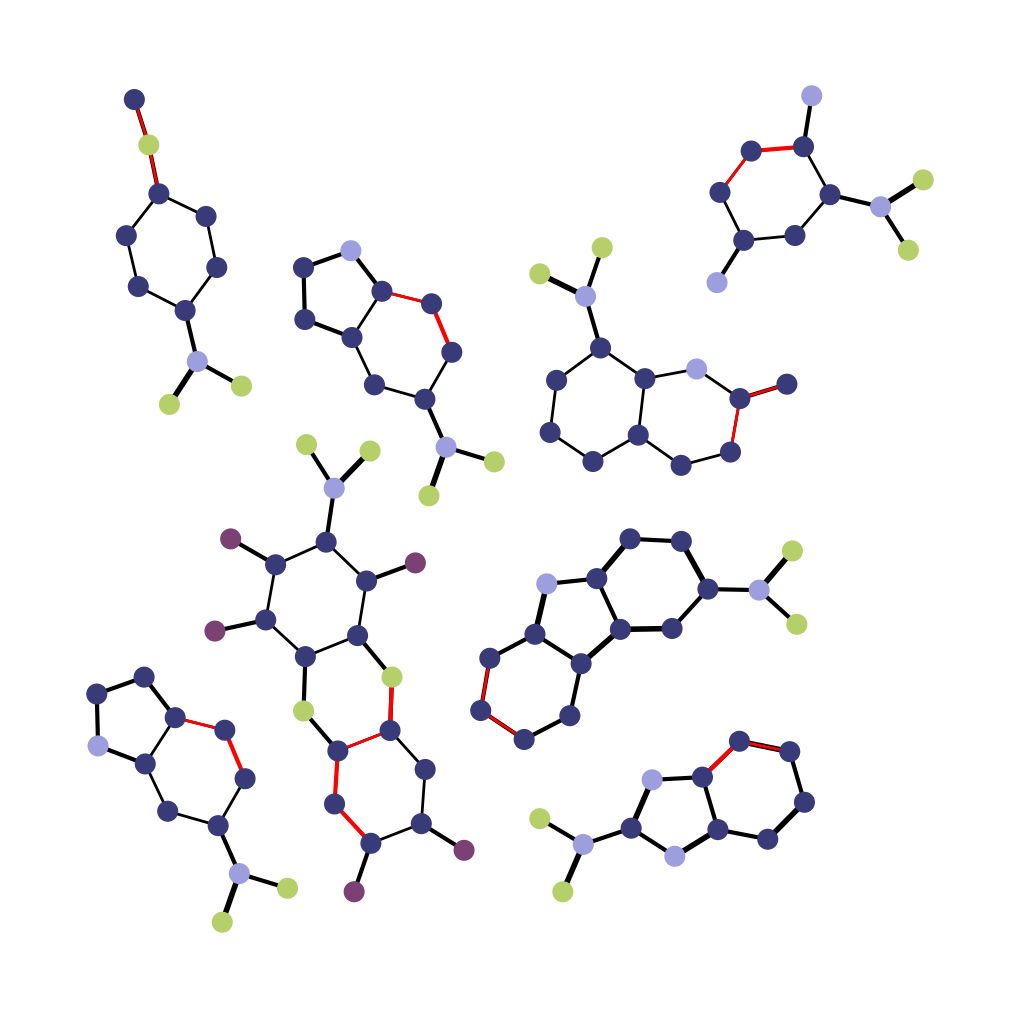

In [66]:
non_parametric_models["SP"].highlight_all("tp")
non_parametric_models["SP"].highlight_all("tn", 200)

In [67]:
# non_parametric_models["SP"].dataset.plot_graph(154, 200)
# non_parametric_models["SP"].dataset.plot_graph(159, 200)

In [15]:
print(non_parametric_models["SP"].kernel.attributes[43])
print(non_parametric_models["SP"].kernel.attributes[51])
print(non_parametric_models["SP"].kernel.attributes[190])
print(non_parametric_models["SP"].kernel.attributes[53])
print(non_parametric_models["SP"].kernel.attributes[4])
print(non_parametric_models["SP"].kernel.attributes[139])
print(non_parametric_models["SP"].kernel.attributes[107])

(0, 0, 2)
(2, 2, 2)
(0, 2, 2)
(0, 1, 3)
(0, 1, 6)
(0, 0, 5)
(0, 0, 1)


In [16]:
print(non_parametric_models["SP"].kernel.attributes[160])

(2, 0, 4)


# Parametric kernels

In [17]:
parametric_models = create_models(parametric_kernels, MUTAG, seed=seed)

In [18]:
for model in parametric_models.values(): model.explain()

Permutation explainer: 39it [00:47,  1.52s/it]                        
Permutation explainer: 39it [02:48,  4.69s/it]                        


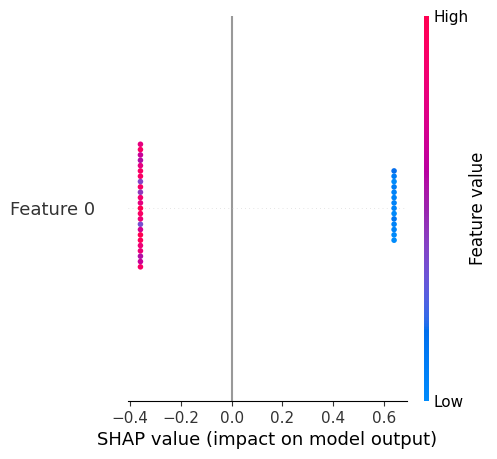

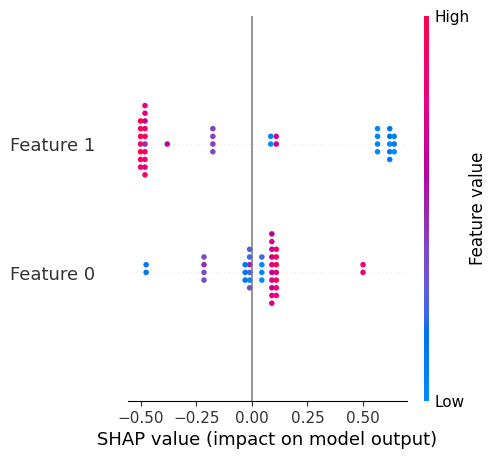

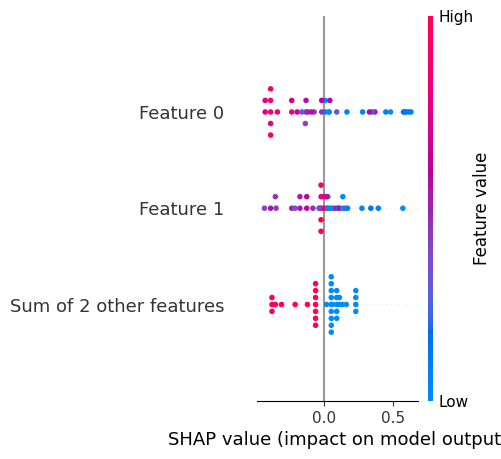

In [34]:
parametric_models["GS_3"].summary_plot(max_display=3, figsize=(4.5,5))
parametric_models["GS_4"].summary_plot(max_display=3, figsize=(4.5,5))
parametric_models["GS_5"].summary_plot(max_display=3, figsize=(2.6,5))

In [74]:
# parametric_models["GS_3"].kernel.plot_graphlet(0, 200, (5,5))
# parametric_models["GS_4"].kernel.plot_graphlet(1, 200, (5,5))
# parametric_models["GS_5"].kernel.plot_graphlet(0, 200, (5,5))
# parametric_models["GS_3"].kernel.plot_all_graphlets(200, (5,5))
# parametric_models["GS_4"].kernel.plot_all_graphlets(200, (5,5))
# parametric_models["GS_5"].kernel.plot_all_graphlets(200, (5,5))

Graph indices: [151 152 156 157 158 160 161 162 163 164 165 166 169 170 172 173 176 179
 182 183 186]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Counter({0: 21})


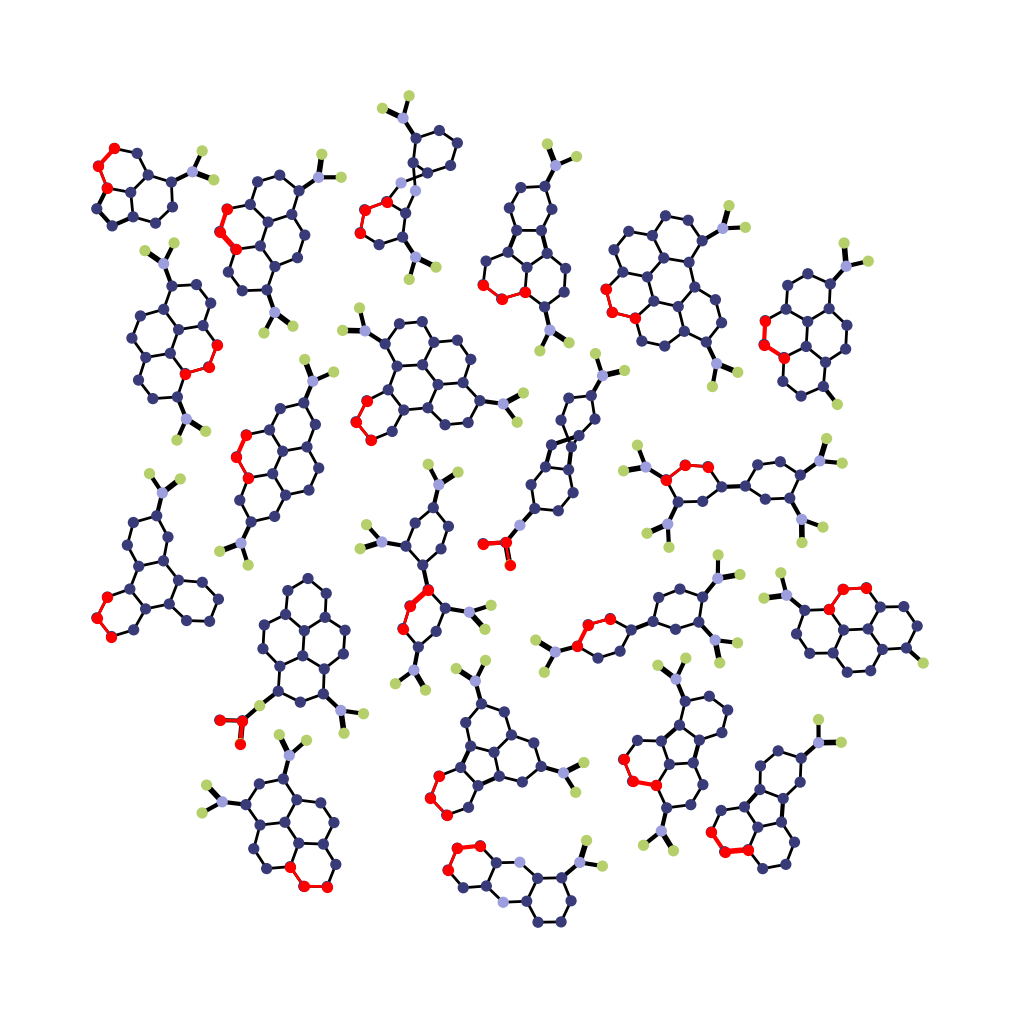

Graph indices: [153 154 155 159 167 180 181 184 185]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
Counter({0: 9})


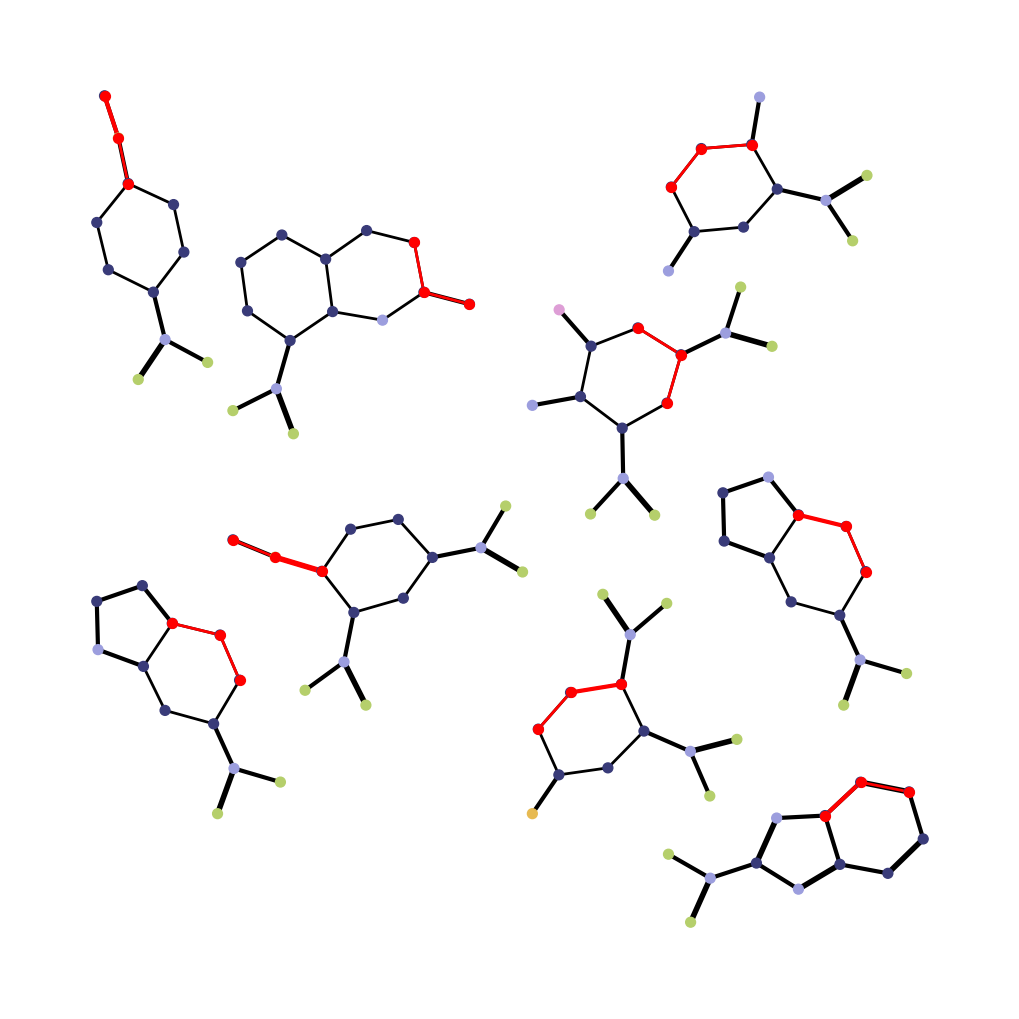

In [70]:
parametric_models["GS_3"].highlight_all("tp")
parametric_models["GS_3"].highlight_all("tn")

In [72]:
# parametric_models["GS_3"].dataset.plot_graph(184, 200)
# parametric_models["GS_3"].dataset.plot_graph(171, 200)

Graph indices: [151 152 156 157 158 160 162 163 164 165 166 169 171 172 173 176 179 182
 183 186]
[1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1]
Counter({1: 17, 0: 3})


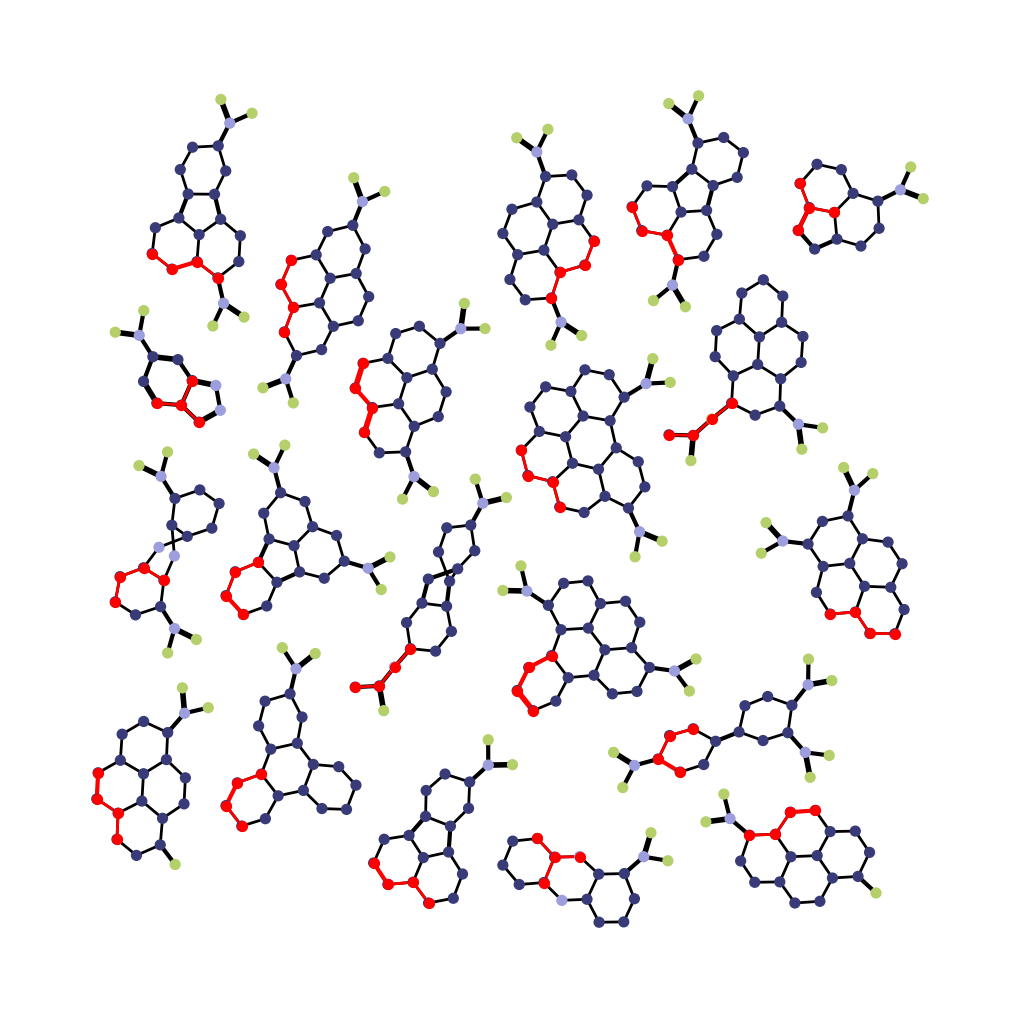

Graph indices: [153 154 155 159 167 180 181 185]
[1, 1, 1, 1, 1, 1, 1, 1]
Counter({1: 8})


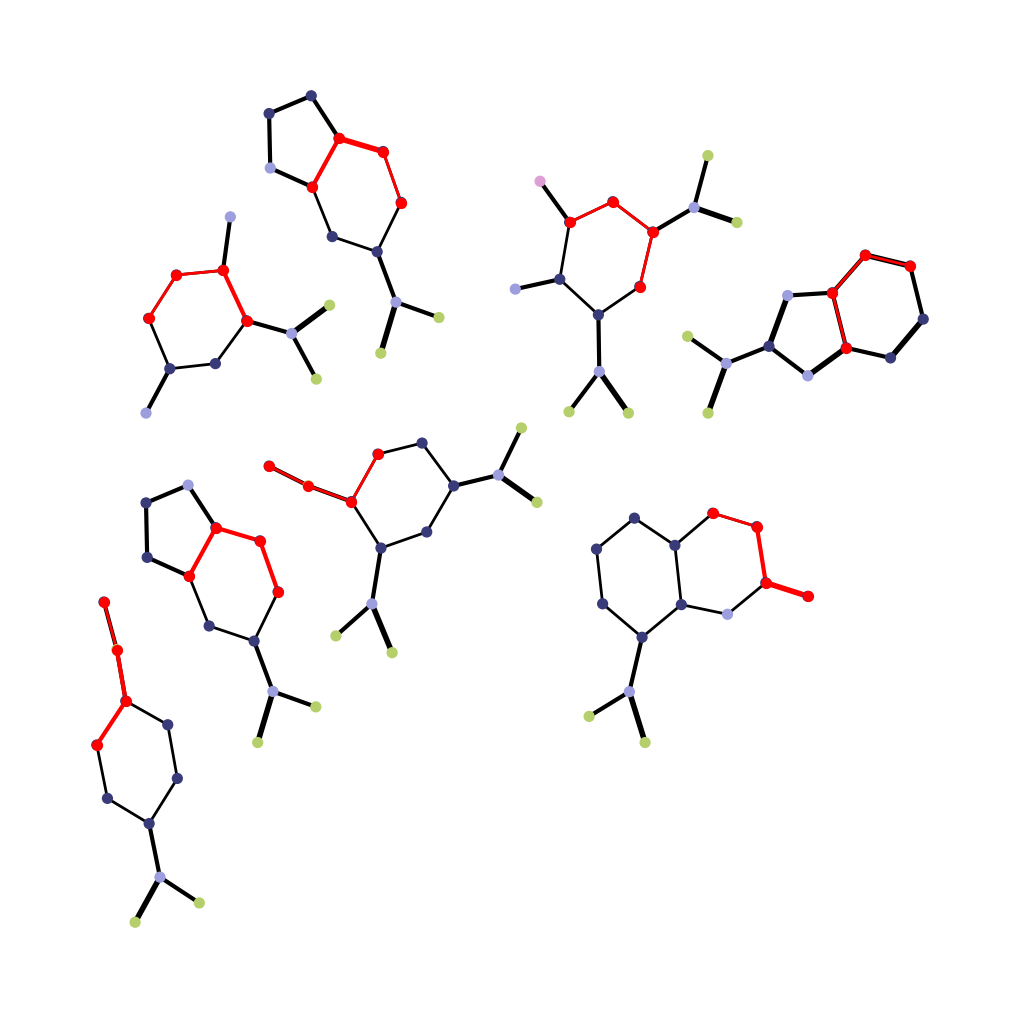

In [65]:
parametric_models["GS_4"].highlight_all("tp")
parametric_models["GS_4"].highlight_all("tn")

Graph indices: [151 152 156 157 158 160 162 163 164 165 166 169 172 173 175 176 179 182
 183 186]
[0, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 2, 1, 0, 0, 2, 0]
Counter({0: 12, 1: 5, 2: 3})


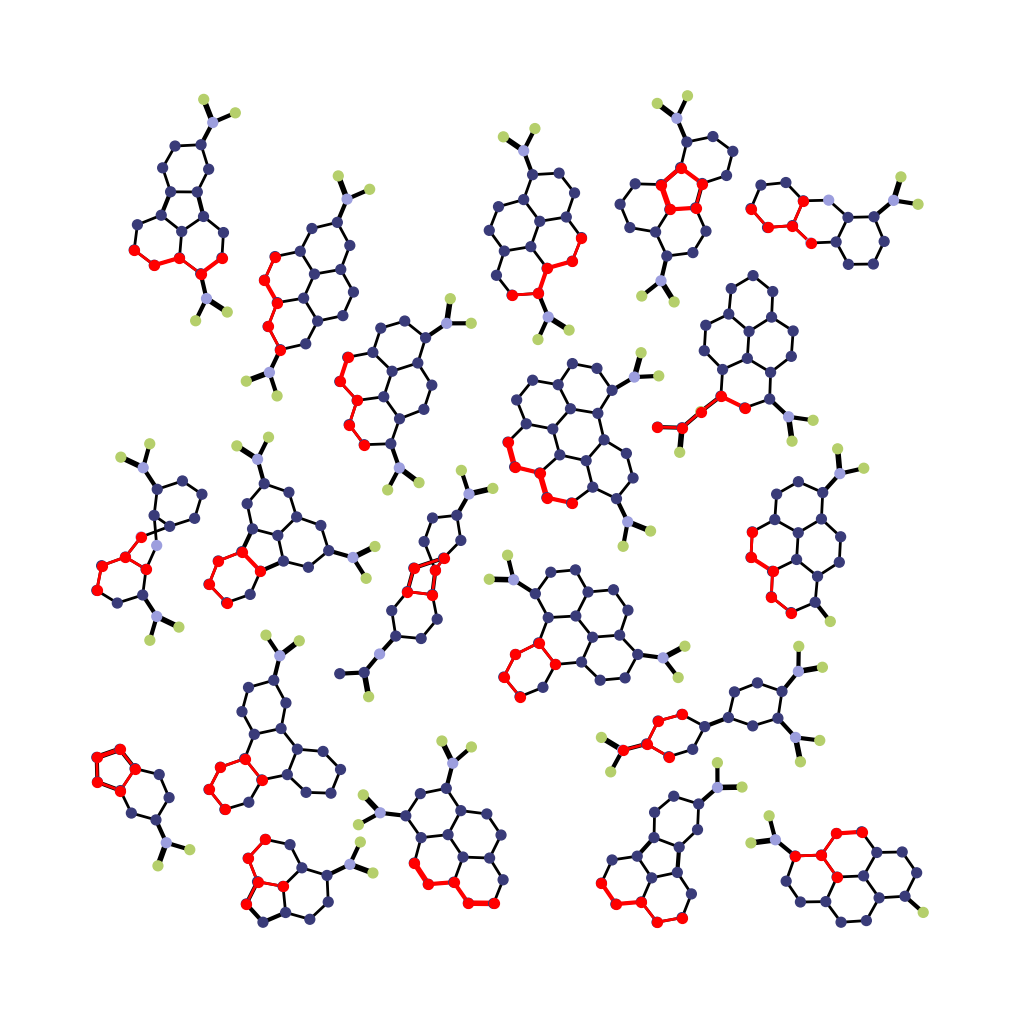

Graph indices: [153 154 159 167 180 181 184]
[0, 0, 0, 1, 0, 0, 1]
Counter({0: 5, 1: 2})


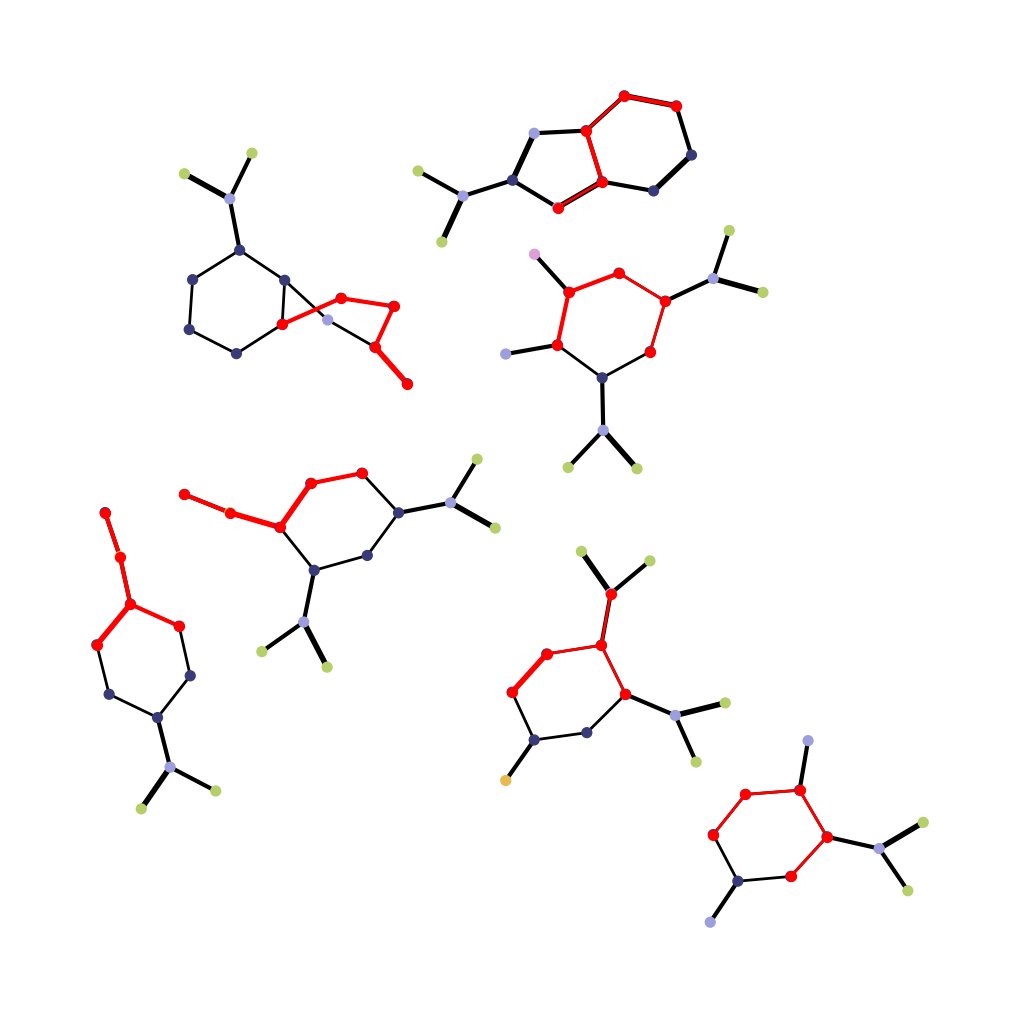

In [23]:
parametric_models["GS_5"].highlight_all("tp")
parametric_models["GS_5"].highlight_all("tn")

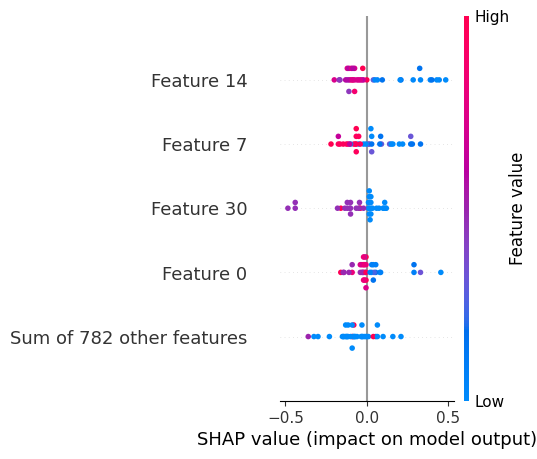

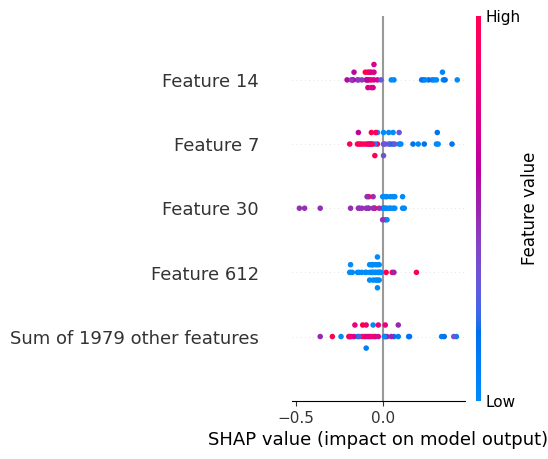

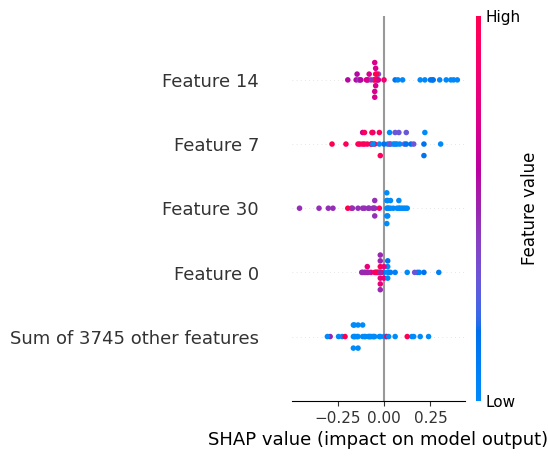

In [55]:
parametric_models["WL_3"].summary_plot(max_display=5, figsize=(2.8,5))
parametric_models["WL_4"].summary_plot(max_display=5, figsize=(2.8,5))
parametric_models["WL_5"].summary_plot(max_display=5, figsize=(2.8,5))

Graph indices: [151 152 156 157 158 160 161 162 163 164 165 166 168 169 170 172 173 175
 176 179 182 183 186]
[612, 14, 14, 7, 7, 7, 612, 30, 30, 0, 7, 65, 30, 612, 74, 69, 7, 14, 14, 14, 7, 30, 0]
Counter({7: 6, 14: 5, 30: 4, 612: 3, 0: 2, 65: 1, 74: 1, 69: 1})


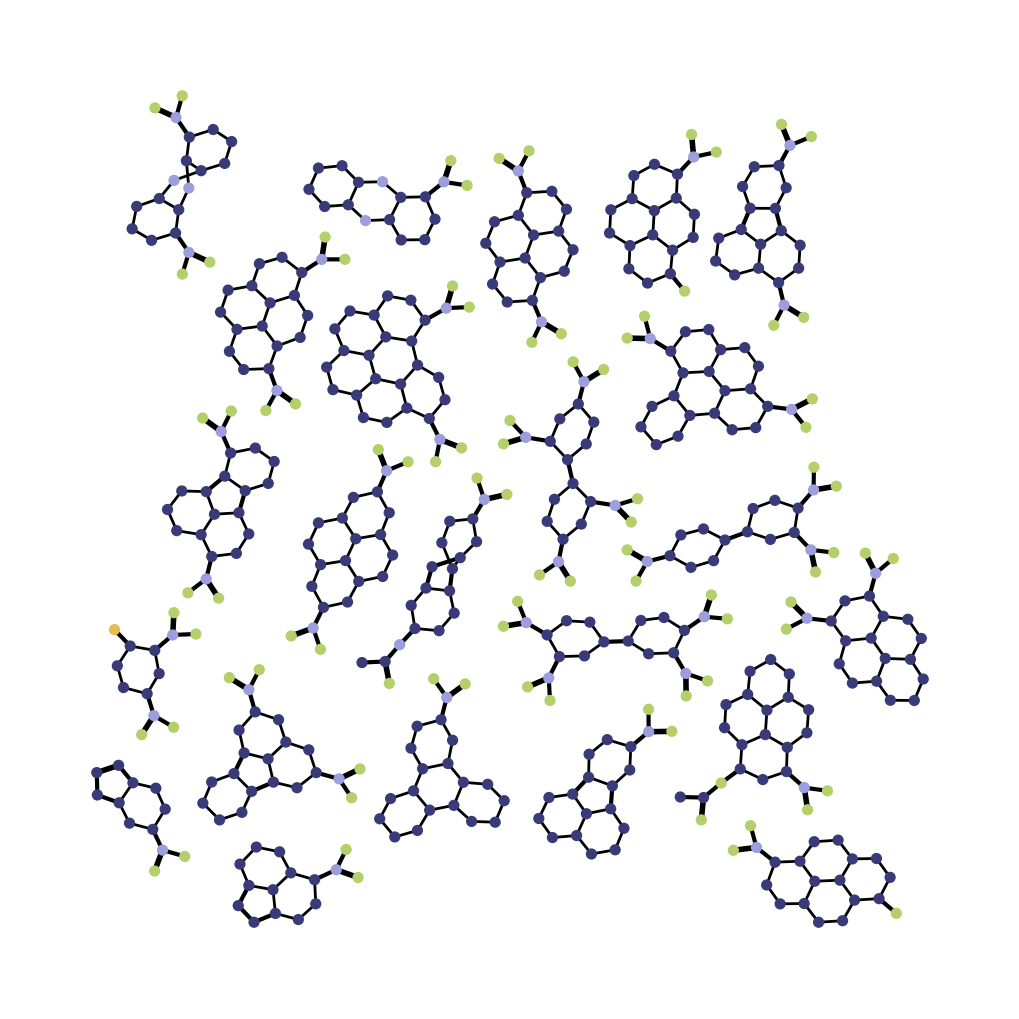

58,[58, 65]
0,[0, 0]
0,[0, 0]
0,[0, 0, 0]
0,[0, 0, 0]
0,[0, 0, 0]
58,[58, 65]
1,[0, 2, 2]
1,[0, 2, 2]
0
0,[0, 0, 0]
14,[7, 14]
1,[0, 2, 2]
58,[58, 65]
14,[8, 14]
14,[7, 8]
0,[0, 0, 0]
0,[0, 0]
0,[0, 0]
0,[0, 0]
0,[0, 0, 0]
1,[0, 2, 2]
0
Graph indices: [153 155 159 167 174 180 181 185]
[14, 14, 14, 14, 14, 14, 0, 7]
Counter({14: 6, 0: 1, 7: 1})


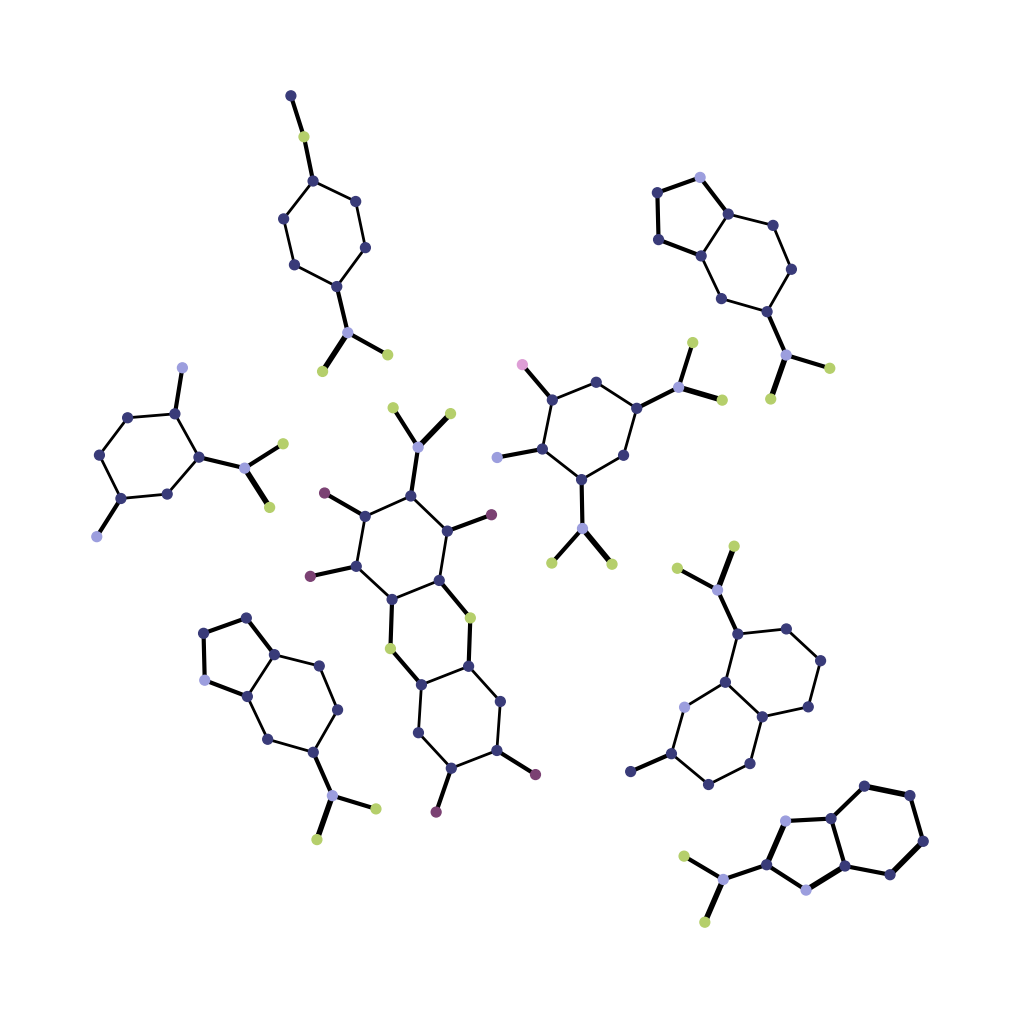

0,[0, 0]
0,[0, 0]
0,[0, 0]
0,[0, 0]
0,[0, 0]
0,[0, 0]
0
0,[0, 0, 0]


In [25]:
parametric_models["WL_3"].highlight_all("tp")
parametric_models["WL_3"].highlight_all("tn")

Graph indices: [151 152 156 157 158 160 161 162 163 164 165 166 168 169 170 172 173 175
 176 179 182 183 186]
[30, 14, 65, 7, 65, 158, 612, 0, 7, 7, 65, 7, 30, 14, 14, 612, 7, 612, 30, 0, 14, 7, 7]
Counter({7: 7, 14: 4, 30: 3, 65: 3, 612: 3, 0: 2, 158: 1})


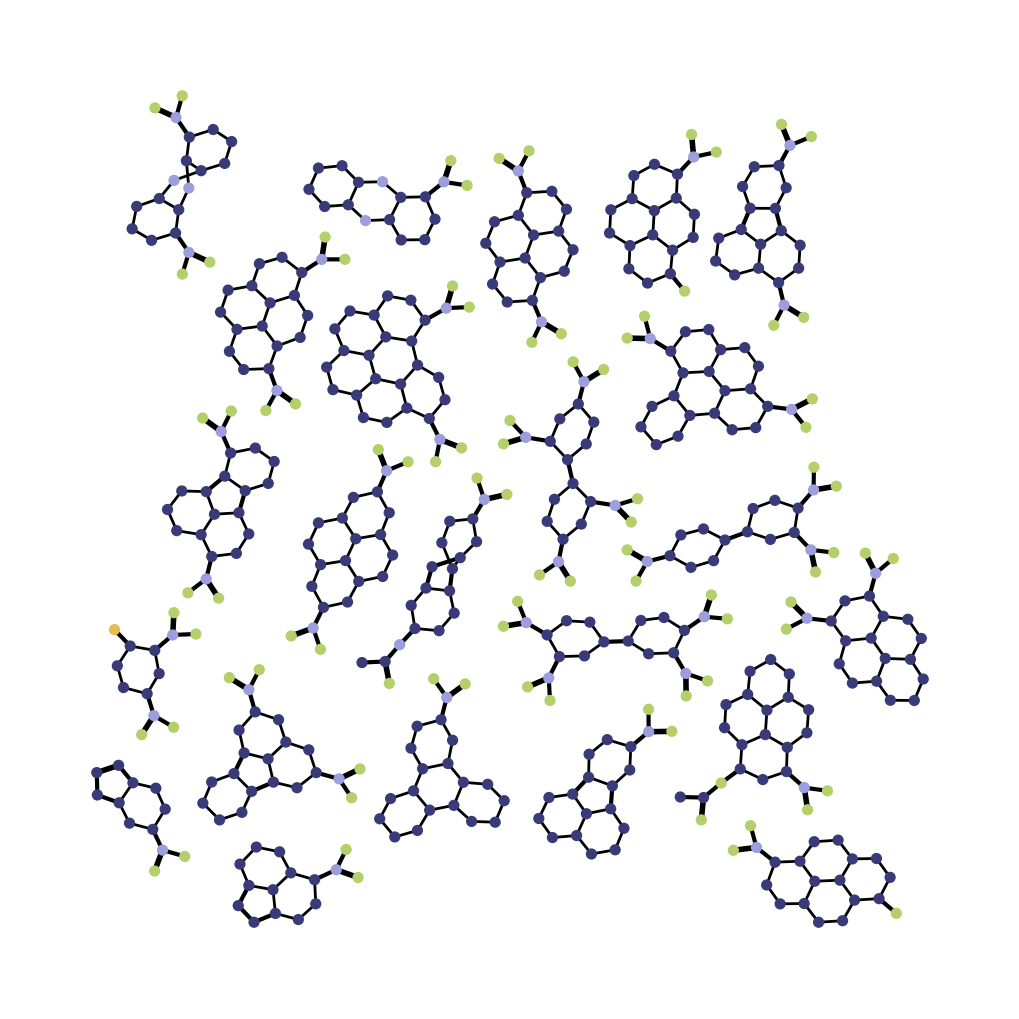

1,[0, 2, 2]
0,[0, 0]
14,[7, 14]
0,[0, 0, 0]
14,[7, 14]
7,[7, 7, 14]
58,[58, 65]
0
0,[0, 0, 0]
0,[0, 0, 0]
14,[7, 14]
0,[0, 0, 0]
1,[0, 2, 2]
0,[0, 0]
0,[0, 0]
58,[58, 65]
0,[0, 0, 0]
58,[58, 65]
1,[0, 2, 2]
0
0,[0, 0]
0,[0, 0, 0]
0,[0, 0, 0]
Graph indices: [153 155 167 174 180 181 185]
[7, 7, 14, 14, 14, 74, 7]
Counter({7: 3, 14: 3, 74: 1})


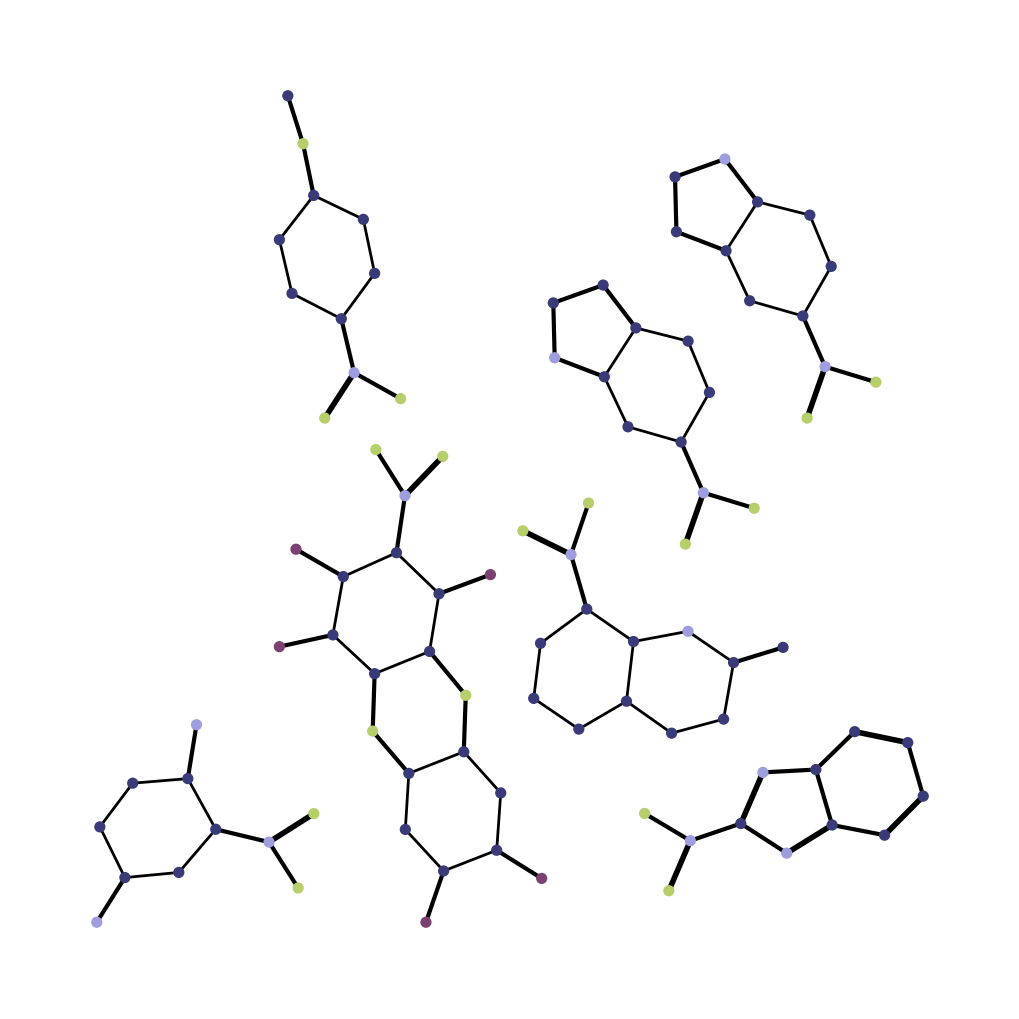

0,[0, 0, 0]
0,[0, 0, 0]
0,[0, 0]
0,[0, 0]
0,[0, 0]
14,[8, 14]
0,[0, 0, 0]


In [26]:
parametric_models["WL_4"].highlight_all("tp")
parametric_models["WL_4"].highlight_all("tn")

In [ ]:
[151 152 156 157 158 160 161 162 163 164 165 166 168 169 170 172 173 175 176 179 182 183 186]
[151 152 156 157 158 160 161 162 163 164 165 166 168 169 170 172 173 175 176 179 182 183 186]
[151 152 156 157 158 160 161 162 163 164 165 166 168 169 172 173 175 176 179 182 183 186]
[151 152 156 157 158 160 161 162 163 164 165 166 169 170 172 173 176 179 182 183 186] -> [161 170]
[151 152 156 157 158 160 162 163 164 165 166 169 171 172 173 176 179 182 183 186] -> [171]
[151 152 156 157 158 160 162 163 164 165 166 169 172 173 175 176 179 182 183 186] -> [175]
[151 152 156 157 158 160 161 162 163 164 165 166 168 169 170 172 173 175 176 179 182 183 186]
[151 152 156 157 158 160 161 162 163 164 165 166 168 169 170 172 173 175 176 179 182 183 186]
[151 152 156 157 158 160 161 162 163 164 165 166 168 169 170 172 173 175 176 179 182 183 186]

[153 154 155 159 167 180 181 185 187] x [174]
[153 154 155 159 167 174 180 181 185 187]
[153 155 167 174 180 181 185 187] x [154 159]
[153 154 155 159 167 180 181 184 185] -> [184]
[153 154 155 159 167 180 181 185] x [174 187]
[153 154 159 167 180 181 184] x [155 174 185 187]
[153 155 159 167 174 180 181 185]
[153 155 167 174 180 181 185]
[153 155 167 174 180 181 185]

Graph indices: [151 152 156 157 158 160 161 162 163 164 165 166 168 169 170 172 173 175
 176 179 182 183 186]
[612, 14, 7, 158, 65, 7, 612, 14, 30, 0, 7, 0, 30, 14, 30, 612, 30, 14, 30, 7, 7, 158, 612]
Counter({7: 5, 30: 5, 612: 4, 14: 4, 158: 2, 0: 2, 65: 1})


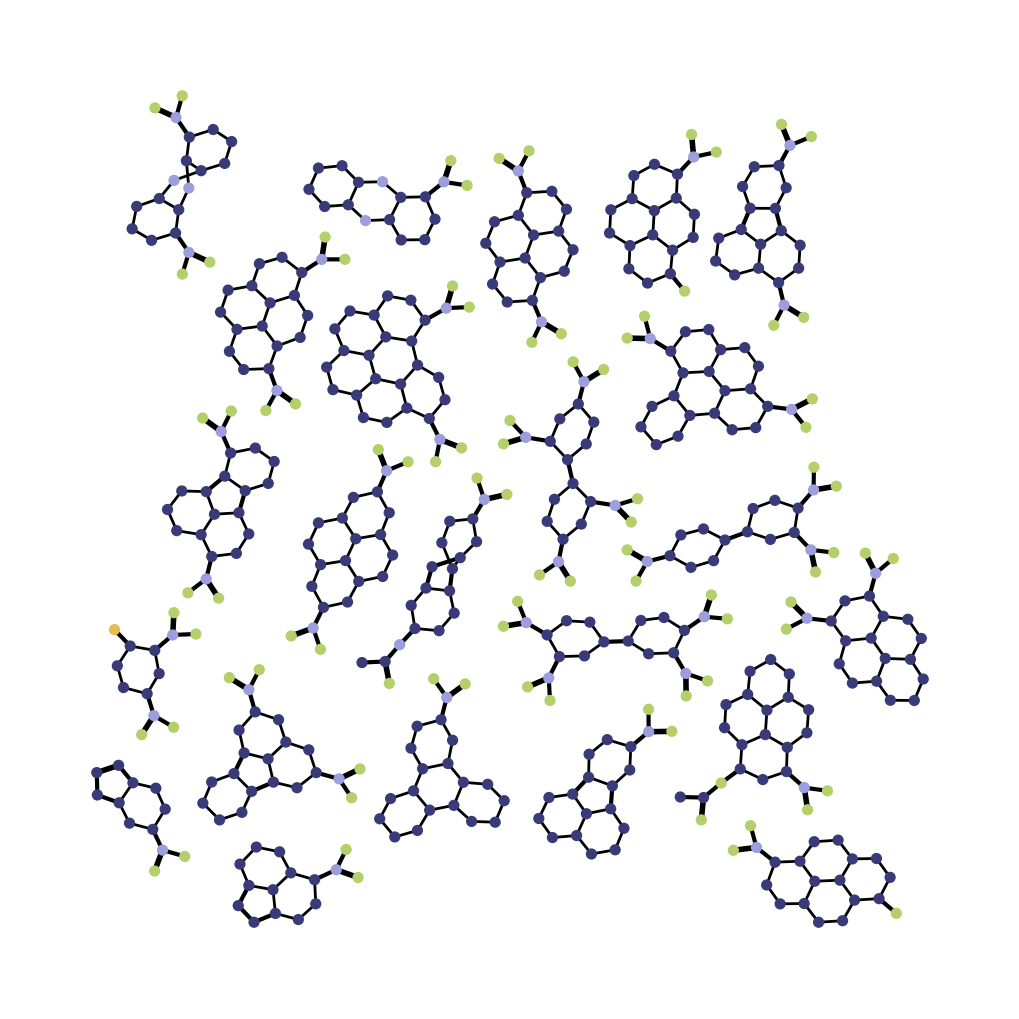

58,[58, 65]
0,[0, 0]
0,[0, 0, 0]
7,[7, 7, 14]
14,[7, 14]
0,[0, 0, 0]
58,[58, 65]
0,[0, 0]
1,[0, 2, 2]
0
0,[0, 0, 0]
0
1,[0, 2, 2]
0,[0, 0]
1,[0, 2, 2]
58,[58, 65]
1,[0, 2, 2]
0,[0, 0]
1,[0, 2, 2]
0,[0, 0, 0]
0,[0, 0, 0]
7,[7, 7, 14]
58,[58, 65]
Graph indices: [153 155 167 174 180 181 185]
[0, 14, 7, 14, 14, 7, 14]
Counter({14: 4, 7: 2, 0: 1})


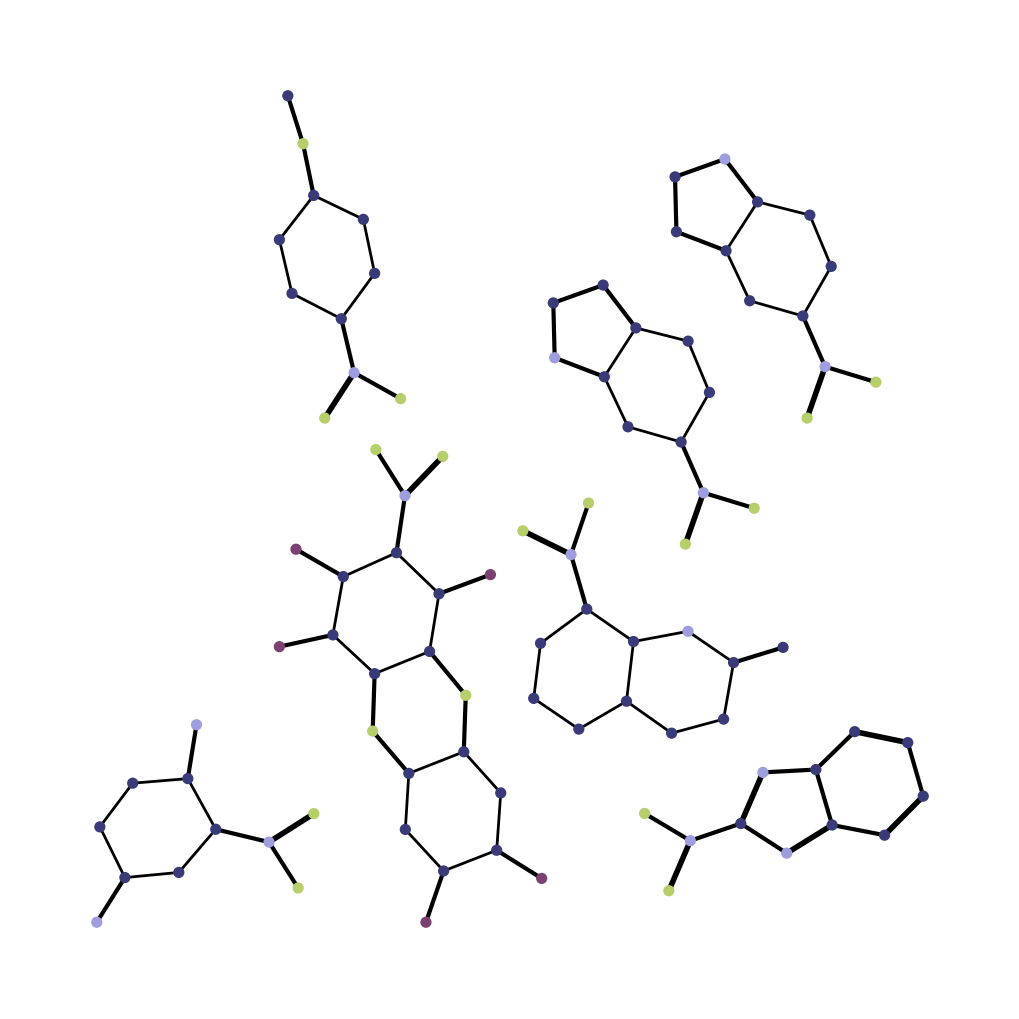

0
0,[0, 0]
0,[0, 0, 0]
0,[0, 0]
0,[0, 0]
0,[0, 0, 0]
0,[0, 0]


In [27]:
parametric_models["WL_5"].highlight_all("tp")
parametric_models["WL_5"].highlight_all("tn")